In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("diamonds")
df = df[(df[["x","y","z"]] != 0).all(axis=1)]
X = df["depth"].values
y = df["price"].values
model = LinearRegression()
X = X.reshape(-1, 1)
model.fit(X, y)

print(model.coef_, model.intercept_)

[-29.86685265] 5775.256869213037


In [4]:
X_ = np.append(np.ones((len(X), 1)), X, axis=1)
theta = np.append(model.intercept_, model.coef_)
y_preds = model.predict(X)

In [10]:
RSS = np.sum((y-y_preds)**2)
RSE = np.sqrt(RSS / (len(X_)-len(X_[0])))
SE_sq = RSE**2 * np.linalg.inv(X_.T.dot(X_)).diagonal()

In [11]:
t = (theta - 0) / np.sqrt(SE_sq)
print(t)

[ 7.79972831 -2.4914259 ]


In [13]:
from scipy import stats

p = [2 * (1 - stats.t.cdf(np.abs(t_v), len(X_) - len(X_[0]))) for t_v in t]
print(p)

[6.439293542825908e-15, 0.012726132305321158]


<Axes: xlabel='depth', ylabel='price'>

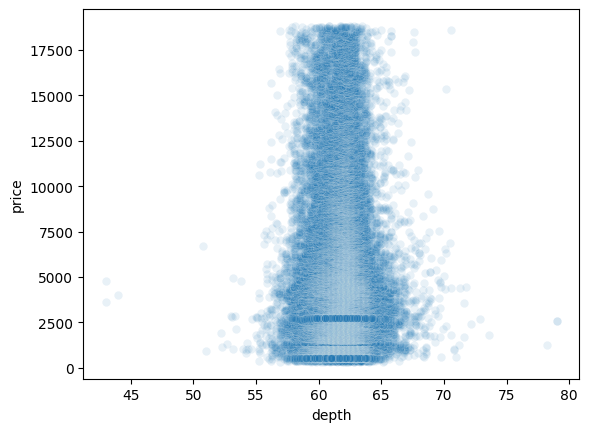

In [17]:
sns.scatterplot(x=df["depth"],y=df["price"], alpha=0.1)